In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("../Data/crime_safety_dataset.csv")

Este dataset contiene informaicon sobre crimenes que se cometieron en distintos lugares de EE UU. Cada fila representa un hecho delictivo individuale incluye los siguientes detalles:

1) id: Identificador único del incidente.

2) date: Fecha en la que ocurrió el crimen.

3) time: Hora exacta del incidente.

4) crime_type: Tipo de crimen (ej. homicidio, Asalto, Vandalismo, Fraude).

5) city: Ciudad donde ocurrió el crimen.

6) state: Estado (de EE.UU.) correspondiente.

7) location_description: Descripción de la ubicación (posiblemente una dirección).

8) victim_age: Edad de la víctima.

9) victim_gender: Género de la víctima (hombre, mujer, Otro).

10) victim_race: Raza de la víctima (ej. negro, asiatico, Otro).

## Preguntas que se responderan en este dataset
### De Exploración general
¿Cuáles son los tipos de crimen más frecuentes?

¿Cómo está distribuida la cantidad de crímenes a lo largo del tiempo?

### De Análisis temporal
¿En qué días de la semana ocurren más crímenes?

¿En qué horario del día se cometen más delitos?

¿Cómo varían los crímenes por mes o año?

### De Análisis geográfico (si tenés ubicación)
¿Cuáles son las zonas o barrios más peligrosos?

¿Ciertos tipos de delitos se concentran en áreas específicas?


### De Análisis por características (si tenés datos de personas)
¿El perfil del sospechoso (edad, género, etc.) varía según el tipo de crimen?

¿Las víctimas comparten características similares entre distintos delitos?

### De Comparaciones
¿Qué tipo de crímenes aumentan durante eventos o días festivos?

¿Hay relación entre ciertos tipos de crímenes y la hora del día?

¿Cómo varía el crimen por temporada o clima (si tenés esos datos)?

### De Ejemplos de preguntas ya preparadas para código:
¿Qué horas tienen más robos?

¿Cuál es el delito más común en cada barrio?

¿Cuál fue el mes más violento de cada año?

### Vistazo rapido del dataset 

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


In [105]:
data.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


In [106]:
data.dtypes

id                       int64
date                    object
time                    object
crime_type              object
city                    object
state                   object
location_description    object
victim_age               int64
victim_gender           object
victim_race             object
dtype: object

Se observa que hay dos columnas que indican fecha y tiempo, estas son de tipo object. La fecha se va a pasar a su respectivo tipo de dato y la hora(time) se deja tal que asi porque pandas no tiene un dtype dedica a solo horas. No se van a unir por comodidad para la hora de graficar o agrupar en un futuro del analisis. (De momento)

In [107]:
data['date'] = pd.to_datetime(data['date'])
print("Ahora el tipo de dato de fecha es",data['date'].dtype)

Ahora el tipo de dato de fecha es datetime64[ns]


## Nulos

In [108]:
for col in data:
    cant_nulos = data[col].isna().sum()
    print(f"La columna {col} posee {cant_nulos} de nulos")

La columna id posee 0 de nulos
La columna date posee 0 de nulos
La columna time posee 0 de nulos
La columna crime_type posee 0 de nulos
La columna city posee 0 de nulos
La columna state posee 0 de nulos
La columna location_description posee 0 de nulos
La columna victim_age posee 0 de nulos
La columna victim_gender posee 0 de nulos
La columna victim_race posee 0 de nulos


No posee valores nulos

## Duplicados

In [109]:
for col in data:
    cant_duplicados = data[col].duplicated().sum()
    print(f"La columna {col} posee {cant_duplicados} de duplicados")

La columna id posee 0 de duplicados
La columna date posee 228 de duplicados
La columna time posee 4 de duplicados
La columna crime_type posee 990 de duplicados
La columna city posee 990 de duplicados
La columna state posee 994 de duplicados
La columna location_description posee 12 de duplicados
La columna victim_age posee 921 de duplicados
La columna victim_gender posee 996 de duplicados
La columna victim_race posee 995 de duplicados


En este dataset si hay presencia de duplicados pero ya que no indican un documento personal o un dato unico, no hay problema. Puede haber un crimen en el mismo dia o a la misma hora, mismo tipo de crime, de ciudad, estado, etc etc.

### Estadisticas generales

In [110]:
data.describe()

,id,date,victim_age
count,1000.000000,1000,1000.000000
mean,500.500000,2023-01-19 22:30:43.199999744,52.201000
min,1.000000,2020-07-31 00:00:00,12.000000
25%,250.750000,2021-10-25 00:00:00,33.000000
50%,500.500000,2023-01-10 12:00:00,53.000000
75%,750.250000,2024-04-29 06:00:00,72.000000
max,1000.000000,2025-07-26 00:00:00,90.000000
std,288.819436,NaN,22.913831


### Vemos si hay algun valor atipico en edad.

<Axes: ylabel='victim_age'>

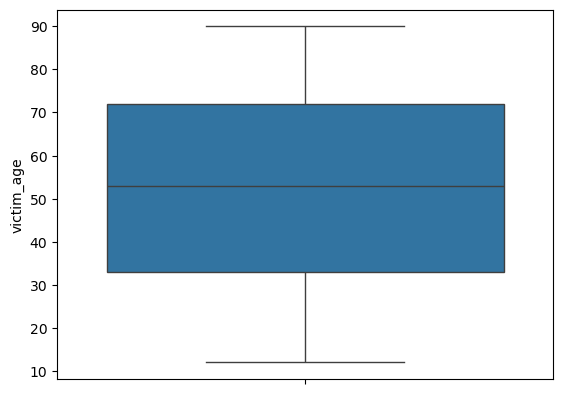

In [111]:
sns.boxplot(data=data['victim_age'])

No se observa valores atipicos.

In [112]:
data.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


#### De Exploración general¶
¿Cuáles son los tipos de crimen más frecuentes?

¿Cómo está distribuida la cantidad de crímenes a lo largo del tiempo?

In [113]:
data['crime_type'].value_counts().reset_index(name='cantidad').rename(columns={'crime_type': 'tipo_crimen'})

,tipo_crimen,cantidad
0,Burglary,121
1,Domestic Violence,121
2,Homicide,101
3,Robbery,101
4,Arson,98
5,Assault,97
6,Vandalism,94
7,Fraud,89
8,Drug Offense,89
9,Theft,89


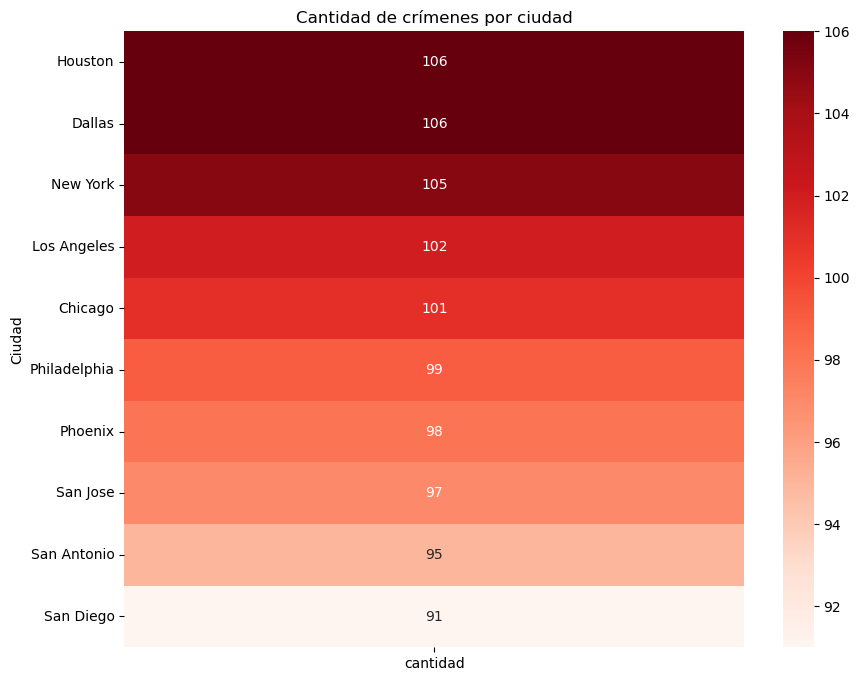

In [114]:
# Contamos crímenes por ciudad
crimen_por_ciudad = data['city'].value_counts().reset_index()
crimen_por_ciudad.columns = ['city', 'cantidad']

heatmap_data = crimen_por_ciudad.set_index('city')

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds')
plt.title('Cantidad de crímenes por ciudad')
plt.ylabel('Ciudad')
plt.show()

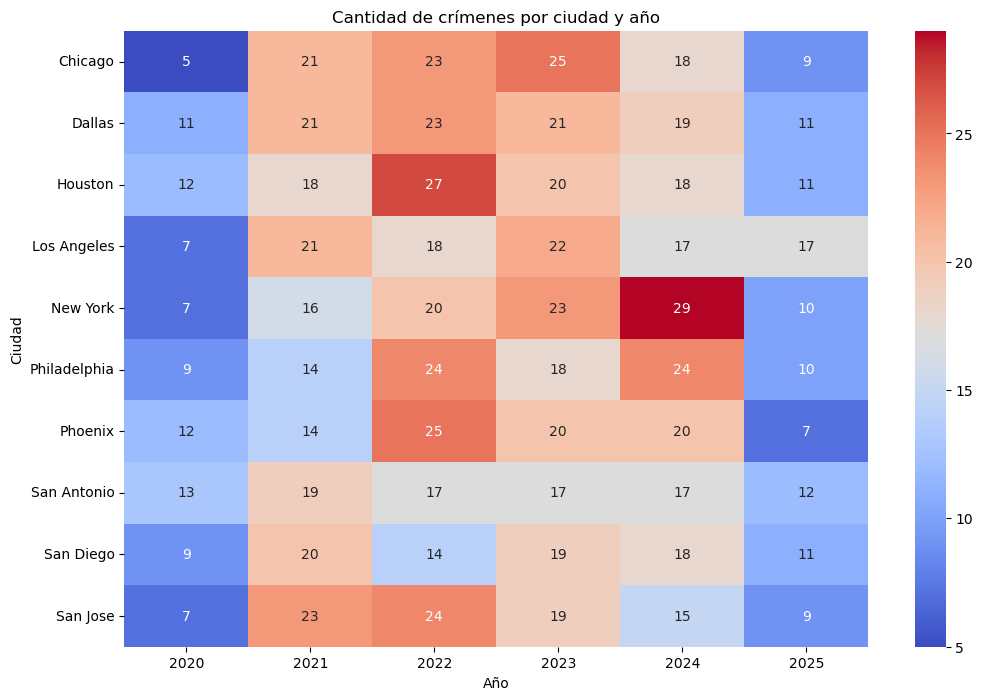

In [115]:
# extraemos el año
data['year'] = data['date'].dt.year

# Contar crímenes por ciudad y año
pivot = data.pivot_table(index='city', columns='year', values='crime_type', aggfunc='count', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title('Cantidad de crímenes por ciudad y año')
plt.ylabel('Ciudad')
plt.xlabel('Año')
plt.show()

#### De Análisis temporal
¿En qué días de la semana ocurren más crímenes?

¿En qué horario del día se cometen más delitos?

¿Cómo varían los crímenes por mes o año?


In [116]:
# vamos a necesitar los dias y meses  por separados.
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
#quedan en int32 pero no es problema porque siempre van a ser valores muy chicos.

In [117]:
dias = {0:'lunes', 1:'martes', 2:'miércoles', 3:'jueves', 4:'viernes', 5:'sábado', 6:'domingo'}
data['dia_sem'] = data['date'].dt.dayofweek.map(dias)

In [118]:
data['dia_sem'].value_counts().reset_index(name='cantidad_crimenes')

,dia_sem,cantidad_crimenes
0,viernes,155
1,miércoles,151
2,jueves,143
3,lunes,143
4,domingo,141
5,sábado,134
6,martes,133


In [119]:
data['hora'] = data['time'].str[:2].astype(int)  # Convertís a int para comparaciones

def asignar_franja(hora):
    if 0 <= hora < 6:
        return 'madrugada'
    elif 6 <= hora < 12:
        return 'mañana'
    elif 12 <= hora < 18:
        return 'tarde'
    else:
        return 'noche'

data['franja_horaria'] = data['hora'].apply(asignar_franja)

In [120]:
data['franja_horaria'].value_counts().reset_index(name='cantidad')

,franja_horaria,cantidad
0,noche,259
1,madrugada,255
2,tarde,245
3,mañana,241


In [121]:
data.groupby(['franja_horaria','dia_sem'])['crime_type'].count()

franja_horaria  dia_sem  
madrugada       domingo      37
                jueves       41
                lunes        35
                martes       36
                miércoles    35
                sábado       39
                viernes      32
mañana          domingo      28
                jueves       32
                lunes        28
                martes       37
                miércoles    39
                sábado       37
                viernes      40
noche           domingo      39
                jueves       37
                lunes        45
                martes       33
                miércoles    35
                sábado       26
                viernes      44
tarde           domingo      37
                jueves       33
                lunes        35
                martes       27
                miércoles    42
                sábado       32
                viernes      39
Name: crime_type, dtype: int64

In [122]:
meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

data['month_name'] = data['month'].map(meses)

In [137]:
data

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race,year,month,day,dia_sem,hora,franja_horaria,month_name,solo_calle
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other,2022,9,9,viernes,18,noche,septiembre,Broadway
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black,2022,7,10,domingo,12,tarde,julio,Oak St
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian,2024,12,31,martes,9,mañana,diciembre,Maple Ave
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian,2024,4,12,viernes,23,noche,abril,Main St
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other,2023,7,19,miércoles,4,madrugada,julio,Broadway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-02-23,07:24:57,Assault,New York,NY,2793 Oak St,72,Female,Asian,2023,2,23,jueves,7,mañana,febrero,Oak St
996,997,2024-10-15,18:10:35,Drug Offense,San Jose,CA,2798 Elm St,26,Male,Other,2024,10,15,martes,18,noche,octubre,Elm St
997,998,2024-02-08,04:00:11,Assault,Houston,TX,8950 Pine St,34,Non-binary,Hispanic,2024,2,8,jueves,4,madrugada,febrero,Pine St
998,999,2023-01-18,16:52:36,Homicide,Chicago,IL,4673 Oak St,16,Other,Hispanic,2023,1,18,miércoles,16,tarde,enero,Oak St


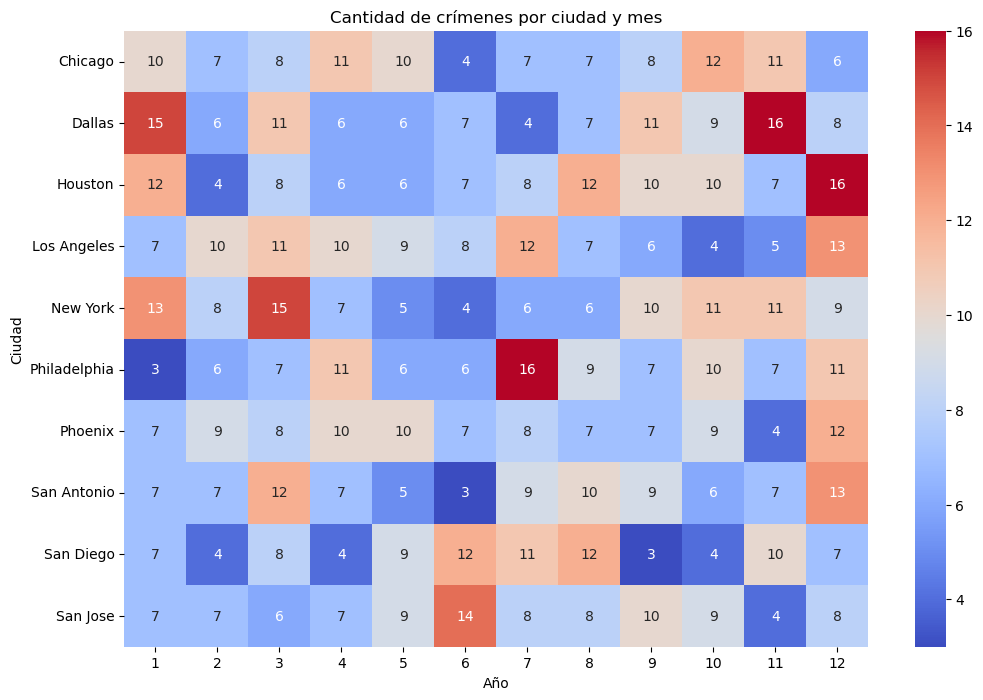

In [138]:
pivot2 = data.pivot_table(index='city', columns='month', values='crime_type', aggfunc='count', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot2, annot=True, fmt='d', cmap='coolwarm')
plt.title('Cantidad de crímenes por ciudad y mes')
plt.ylabel('Ciudad')
plt.xlabel('Año')
plt.show()

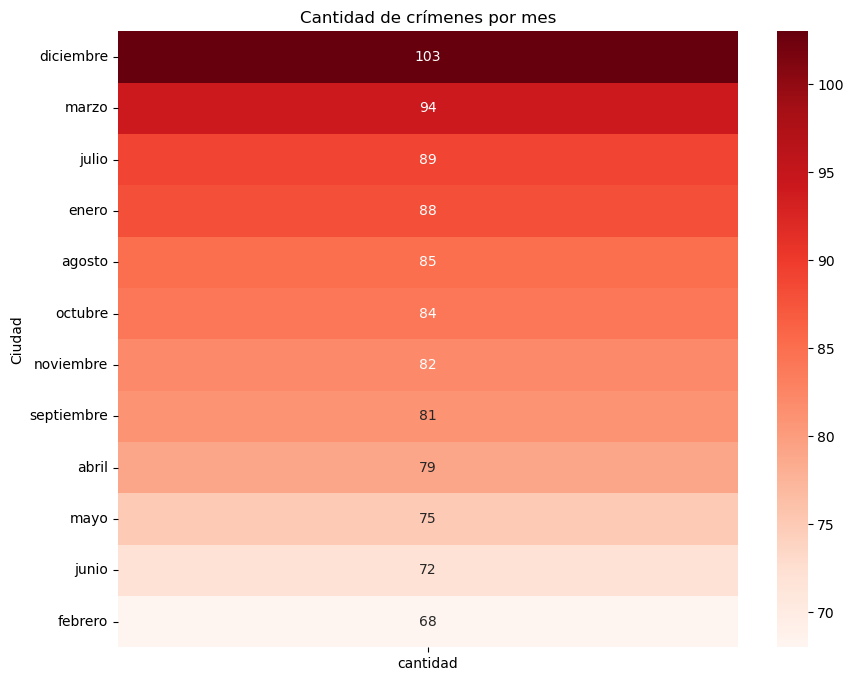

In [124]:
crimen_por_mes = data['month_name'].value_counts().reset_index()
crimen_por_mes.columns = ['mes', 'cantidad']

heatmap_data2 = crimen_por_mes.set_index('mes')

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data2, annot=True, fmt='d', cmap='Reds')
plt.title('Cantidad de crímenes por mes')
plt.ylabel('Ciudad')
plt.show()

In [125]:
data.groupby('state')['city'].value_counts()

state  city        
AZ     Phoenix          98
CA     Los Angeles     102
       San Jose         97
       San Diego        91
IL     Chicago         101
NY     New York        105
PA     Philadelphia     99
TX     Dallas          106
       Houston         106
       San Antonio      95
Name: count, dtype: int64

In [126]:
data['solo_calle'] = data['location_description'].str.replace(
    r'^\d{2,4}\s+(Broadway|Oak St|Main St|Pine St|Maple Ave|Elm St)',
    r'\1',
    regex=True
)

In [128]:
data['solo_calle'].value_counts().reset_index(name='cantidad')

,solo_calle,cantidad
0,Pine St,184
1,Broadway,176
2,Main St,169
3,Maple Ave,163
4,Oak St,157
5,Elm St,151


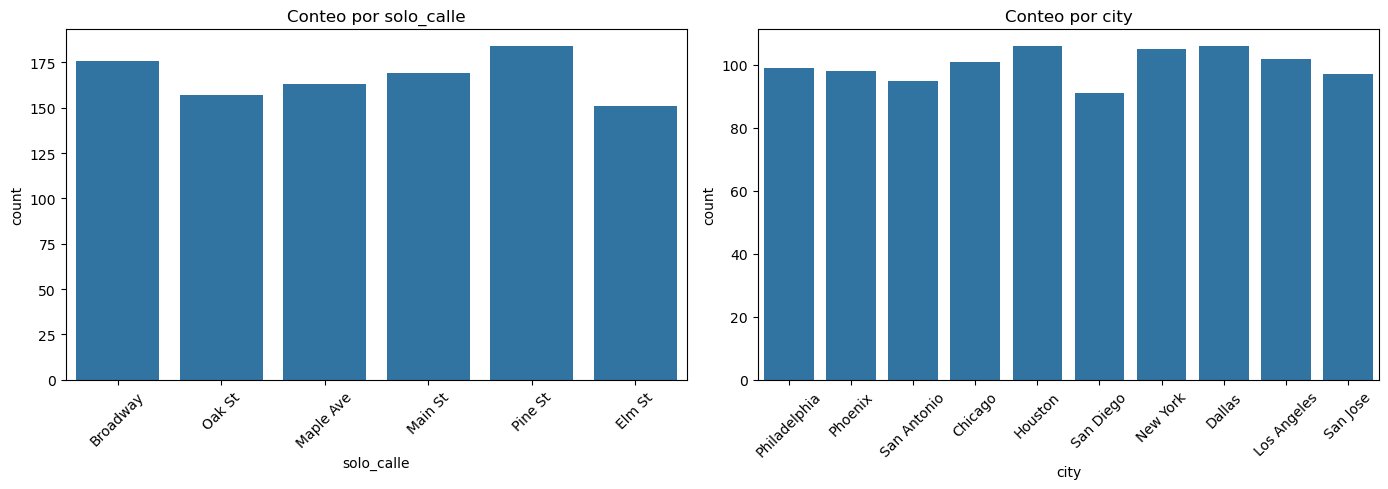

In [129]:
categoricas = ['solo_calle', 'city']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

for ax, col in zip(axes, categoricas):
    sns.countplot(x=col, data=data, ax=ax)
    ax.set_title(f'Conteo por {col}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [130]:
mas_frecuente = (
    data.groupby('crime_type')['solo_calle']
        .value_counts()
        .groupby(level=0)
        .idxmax()
        .apply(lambda x: x[1])
        .reset_index(name='Calle')
)
mas_frecuente

,crime_type,Calle
0,Arson,Main St
1,Assault,Main St
2,Burglary,Main St
3,Domestic Violence,Broadway
4,Drug Offense,Broadway
5,Fraud,Maple Ave
6,Homicide,Broadway
7,Robbery,Main St
8,Theft,Maple Ave
9,Vandalism,Pine St


In [131]:
data['victim_gender'].value_counts()

victim_gender
Male          272
Female        259
Other         237
Non-binary    232
Name: count, dtype: int64

In [132]:
data['victim_age'].mean()

52.201

In [133]:
data.groupby('city')['victim_age'].mean().reset_index(name='promedio_edad').round(2)

,city,promedio_edad
0,Chicago,57.16
1,Dallas,51.44
2,Houston,51.49
3,Los Angeles,53.53
4,New York,50.65
5,Philadelphia,51.96
6,Phoenix,50.52
7,San Antonio,48.09
8,San Diego,53.25
9,San Jose,53.91


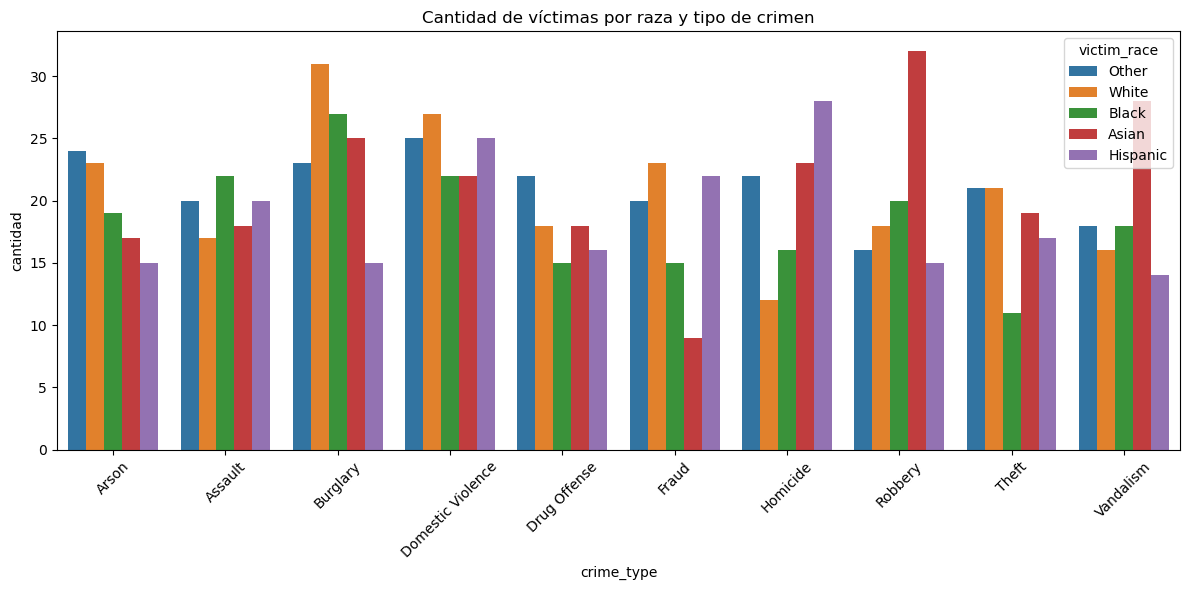

In [134]:

muestreo1 = (
    data.groupby('crime_type')['victim_race']
        .value_counts()
        .reset_index(name='cantidad')
)

plt.figure(figsize=(12, 6))
sns.barplot(data=muestreo1, x='crime_type', y='cantidad', hue='victim_race')
plt.title('Cantidad de víctimas por raza y tipo de crimen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [135]:
mas_frecuente2 = (
    data.groupby('crime_type')['victim_race']
        .value_counts()
        .groupby(level=0)
        .idxmax()
        .apply(lambda x: x[1])
        .reset_index(name='raza')
)
mas_frecuente2  #mayor crimen por raza 

,crime_type,raza
0,Arson,Other
1,Assault,Black
2,Burglary,White
3,Domestic Violence,White
4,Drug Offense,Other
5,Fraud,White
6,Homicide,Hispanic
7,Robbery,Asian
8,Theft,Other
9,Vandalism,Asian


In [89]:
crimen_por_raza = data.groupby('crime_type')['victim_race'].value_counts().unstack(fill_value=0)
crimen_por_raza

victim_race,Asian,Black,Hispanic,Other,White
crime_type,,,,,
Arson,17,19,15,24,23
Assault,18,22,20,20,17
Burglary,25,27,15,23,31
Domestic Violence,22,22,25,25,27
Drug Offense,18,15,16,22,18
Fraud,9,15,22,20,23
Homicide,23,16,28,22,12
Robbery,32,20,15,16,18
Theft,19,11,17,21,21


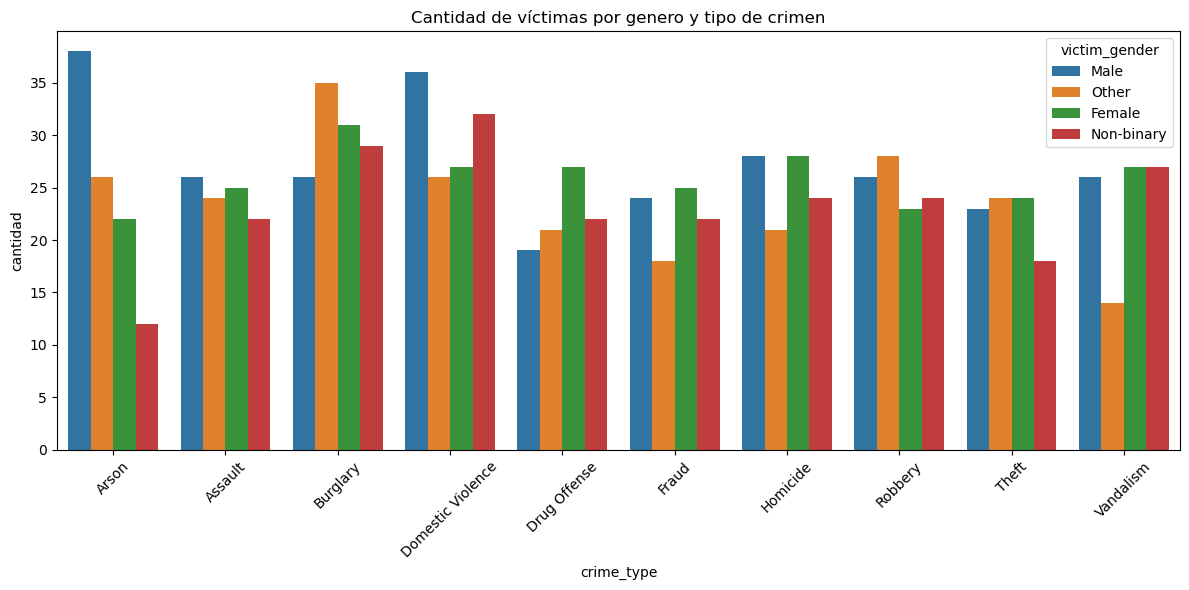

In [90]:

muestreo3 = (
    data.groupby('crime_type')['victim_gender']
        .value_counts()
        .reset_index(name='cantidad')
)

plt.figure(figsize=(12, 6))
sns.barplot(data=muestreo3, x='crime_type', y='cantidad', hue='victim_gender')
plt.title('Cantidad de víctimas por genero y tipo de crimen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()